Assignment -01             190539T-Sajeepan

Q-1> Intensity transformation

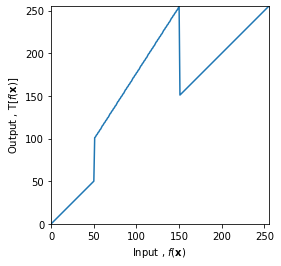

Text(0.5, 1.0, 'transformed image')

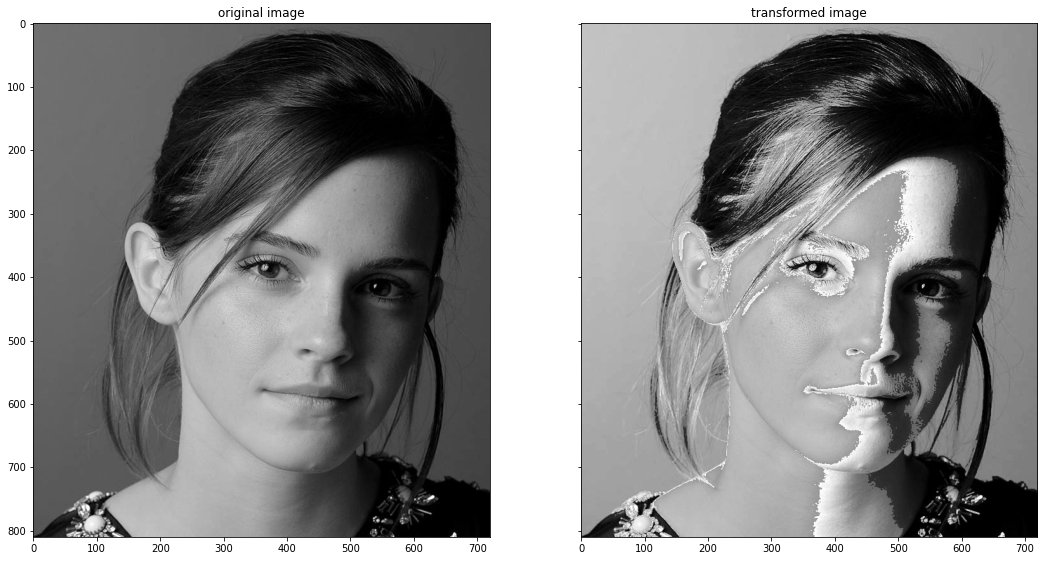

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

c=np.array([(50,50),(50,100),(150,150)])

t1=np.linspace(0,c[0,1],c[0,0]+1).astype('uint8')
t2=np.linspace(c[1,1]+1,255,c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,255,255-c[2,0]).astype('uint8')

transform= np.concatenate((t1,t2),axis=0).astype('uint8')
transform= np.concatenate((transform,t3),axis=0).astype('uint8')

fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax.set_ylabel('Output , $\mathrm{T } [ f ( \mathbf { x } ) ] $')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_org =cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_org, transform)

fig, ax =plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img_org,cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(image_transformed,cmap='gray')
ax[1].set_title('transformed image')


Q2> A brain proton density slice.

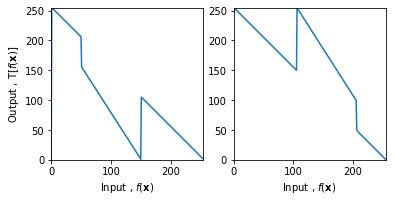

Text(0.5, 1.0, 'Transformed image gray matter')

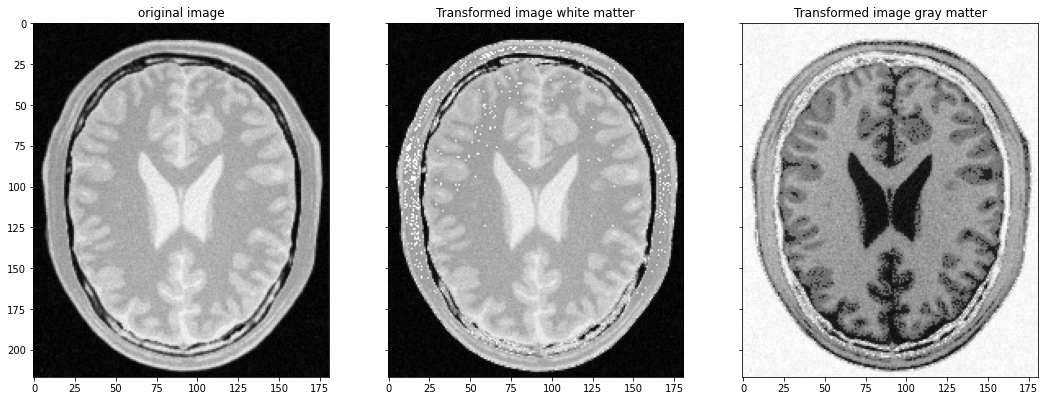

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

c=np.array([(50,50),(50,100),(150,150)])

t1=np.linspace(0,c[0,1],c[0,0]+1).astype('uint8')
t2=np.linspace(c[1,1]+1,255,c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,255,255-c[2,0]).astype('uint8')

transform= np.concatenate((t1,t2),axis=0).astype('uint8')
transform= np.concatenate((transform,t3),axis=0).astype('uint8')

c=np.array([(105,150),(205,100),(205,50)])

t_1=np.linspace(255,c[0,1],c[0,0]+1).astype('uint8')
t_2=np.linspace(255,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t_3=np.linspace(c[2,1],0,c[1,1]-c[2,1]).astype('uint8')


t_w= np.concatenate((t_1,t_2),axis=0).astype('uint8')
t_w= np.concatenate((t_w,t_3),axis=0).astype('uint8')

fig,ax=plt.subplots(1,2)
ax[0].plot(-transform)
ax[0].set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax[0].set_ylabel('Output , $\mathrm{T } [ f ( \mathbf { x } ) ] $')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[1].plot(t_w)
ax[1].set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,255)
ax[1].set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_org =cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
image_trans_white = cv.LUT(img_org, transform)
image_trans_gray = cv.LUT(img_org, t_w)


fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img_org,cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(image_trans_white,cmap='gray')
ax[1].set_title('Transformed image white matter')
ax[2].imshow(image_trans_gray,cmap='gray')
ax[2].set_title('Transformed image gray matter')
